In [31]:
import numpy as np
import time
import hiive.mdptoolbox.example
import hiive.mdptoolbox.mdp
import matplotlib.pyplot as plt
import seaborn as sns;
import helper
import gym

# graph setup and styling
sns.set_style('dark')
flatui = ["#2ecc71", "#3498db", "#95a5a6", "#e74c3c", "#34495e"]
sns.set_palette(flatui)

# gym setup
problemName = 'FrozenLake'
env = gym.make("FrozenLake8x8-v0")

In [32]:
reward, policy = np.zeros([env.nS, env.nA]), np.zeros([env.nA, env.nS, env.nS])        
reward, policy = helper.transform_env(env, reward, policy)

# setting up VI Analysis

value_store = {
    'iterations': [],
    'time': [],
    'policy': [],
    'reward': [],
    'mean V': [],
    'max V': [],
    'error': []
}


for i in np.arange(1,20):
    value_iteration = hiive.mdptoolbox.mdp.ValueIteration(policy, reward, 0.95, max_iter=i)
    run = value_iteration.run()
    value_store['policy'].append(value_iteration.policy)
    value_store['iterations'].append(run[i-1]['Iteration'])
    value_store['time'].append(run[i-1]['Time'])
    value_store['reward'].append(run[i-1]['Reward'])
    value_store['mean V'].append(run[i-1]['Mean V'])
    value_store['max V'].append(run[i-1]['Max V'])
    value_store['error'].append(run[i-1]['Error'])

print(value_store['reward'])
print(value_store['max V'])
print(value_store['error'])
print(value_store['mean V'])
print('final policy: ' + str(value_store['policy'][-1]))

print(run[0])


[1.0, 1.3166666666666667, 1.5172222222222222, 1.6442407407407407, 1.7347414351851849, 1.8016113927469133, 1.852029217892661, 1.8903467650034291, 1.919569216556933, 1.9418871476943638, 1.9589420602551009, 1.9719782865227904, 1.981943775107942, 1.9895621730313717, 1.9953863734719426, 1.999838957477397, 2.003242955000636, 2.0058453120903983, 2.007834815862493]
[1.0, 1.3166666666666667, 1.5172222222222222, 1.6442407407407407, 1.7347414351851849, 1.8016113927469133, 1.852029217892661, 1.8903467650034291, 1.919569216556933, 1.9418871476943638, 1.9589420602551009, 1.9719782865227904, 1.981943775107942, 1.9895621730313717, 1.9953863734719426, 1.999838957477397, 2.003242955000636, 2.0058453120903983, 2.007834815862493]
[1.0, 0.31666666666666665, 0.2005555555555556, 0.15877314814814814, 0.12066759259259252, 0.09234422710905343, 0.0705849552040465, 0.05396387884766507, 0.04125522572259377, 0.03153968747542257, 0.024112117758283258, 0.020745580767375177, 0.018468843450738903, 0.016921401651152912,

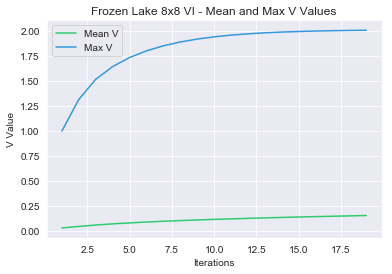

In [33]:
# mean and max v
plt.figure()
plt.plot(np.arange(1,20), value_store['mean V'], label='Mean V')
plt.plot(np.arange(1,20), value_store['max V'], label='Max V')
plt.title('Frozen Lake 8x8 VI - Mean and Max V Values')
plt.xlabel('Iterations')
plt.ylabel("V Value")
plt.legend()
plt.grid()
plt.show()

No handles with labels found to put in legend.


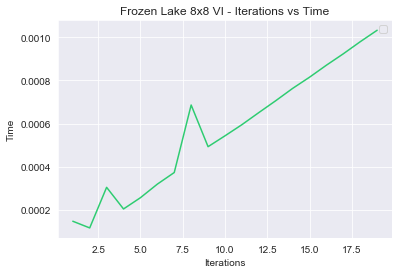

In [34]:
# reward
plt.figure()
plt.plot(np.arange(1,20), value_store['time'])
plt.title('Frozen Lake 8x8 VI - Iterations vs Time')
plt.xlabel('Iterations')
plt.ylabel("Time")
plt.legend()
plt.grid()
plt.show()

No handles with labels found to put in legend.


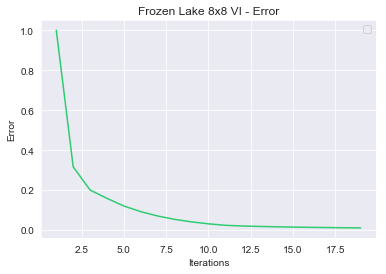

In [35]:
# reward
plt.figure()
plt.plot(np.arange(1,20), value_store['error'])
plt.title('Frozen Lake 8x8 VI - Error')
plt.xlabel('Iterations')
plt.ylabel("Error")
plt.legend()
plt.grid()
plt.show()

In [36]:
value_store = {
    'iterations': [],
    'time': [],
    'policy': [],
    'reward': [],
    'mean V': [],
    'max V': [],
    'error': []
}

for i in np.arange(.1,1,.1):
    value_iteration = hiive.mdptoolbox.mdp.ValueIteration(policy, reward, i)
    run = value_iteration.run()
    value_store['policy'].append(value_iteration.policy)
    value_store['iterations'].append(run[-1]['Iteration'])
    value_store['time'].append(run[-1]['Time'])
    value_store['reward'].append(run[-1]['Reward'])
    value_store['mean V'].append(run[-1]['Mean V'])
    value_store['max V'].append(run[-1]['Max V'])
    value_store['error'].append(run[-1]['Error'])

print(value_store['reward'])
print(value_store['max V'])
print(value_store['error'])
print(value_store['mean V'])
print('final policy: ' + str(value_store['policy'][-1]))

print(run[0])

[1.0333333333333334, 1.0666666666666667, 1.12, 1.1783703703703703, 1.2476851851851851, 1.33632, 1.4493666305273587, 1.6064940486463, 1.8432768335343015]
[1.0333333333333334, 1.0666666666666667, 1.12, 1.1783703703703703, 1.2476851851851851, 1.33632, 1.4493666305273587, 1.6064940486463, 1.8432768335343015]
[0.03333333333333344, 0.06666666666666667, 0.020000000000000018, 0.011851851851851863, 0.009259259259259217, 0.0044800000000000395, 0.003584878536808389, 0.0023487472276935706, 0.0010272068034323165]
[0.0328125, 0.034375, 0.03734375, 0.04085185185185186, 0.04539207175925926, 0.05205, 0.06177134351192178, 0.07907340559708705, 0.12740232816713232]
final policy: (3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 2, 1, 3, 2, 0, 0, 2, 3, 2, 1, 3, 3, 3, 1, 0, 0, 2, 1, 3, 3, 0, 0, 2, 1, 3, 2, 0, 0, 0, 1, 3, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0)
{'State': None, 'Action': None, 'Reward': 1.0, 'Error': 1.0, 'Time': 4.601478576660156e-05, 'Max V': 1.0, 'Mean V': 0.03125, 'Iteration': 1

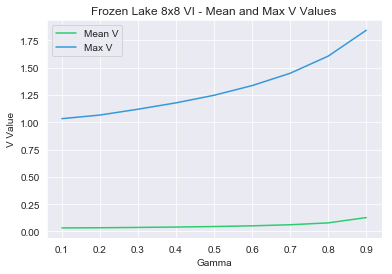

In [37]:
# mean and max v
plt.figure()
plt.plot(np.arange(.1,1,.1), value_store['mean V'], label='Mean V')
plt.plot(np.arange(.1,1,.1), value_store['max V'], label='Max V')
plt.title('Frozen Lake 8x8 VI - Mean and Max V Values')
plt.xlabel('Gamma')
plt.ylabel("V Value")
plt.legend()
plt.grid()
plt.show()

No handles with labels found to put in legend.


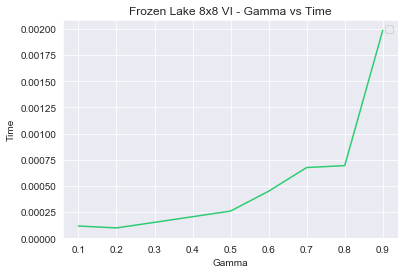

In [38]:
# reward
plt.figure()
plt.plot(np.arange(.1,1,.1), value_store['time'])
plt.title('Frozen Lake 8x8 VI - Gamma vs Time')
plt.xlabel('Gamma')
plt.ylabel("Time")
plt.legend()
plt.grid()
plt.show()

No handles with labels found to put in legend.


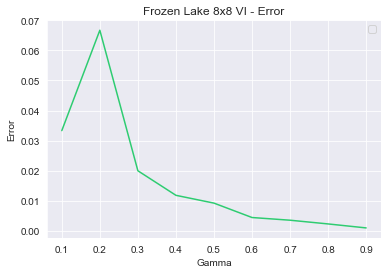

In [41]:
# reward
plt.figure()
plt.plot(np.arange(.1,1,.1), value_store['error'])
plt.title('Frozen Lake 8x8 VI - Error')
plt.xlabel('Gamma')
plt.ylabel("Error")
plt.legend()
plt.grid()
plt.show()

No handles with labels found to put in legend.


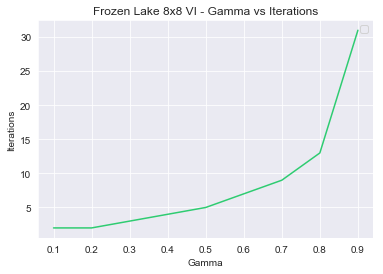

In [42]:
# reward
plt.figure()
plt.plot(np.arange(.1,1,.1), value_store['iterations'])
plt.title('Frozen Lake 8x8 VI - Gamma vs Iterations')
plt.xlabel('Gamma')
plt.ylabel("Iterations")
plt.legend()
plt.grid()
plt.show()